In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#%matplotlib QT

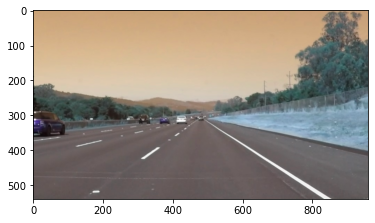

In [9]:
image = cv2.imread("CarND-LaneLines-P1/test_images/solidWhiteRight.jpg")
#plt.figure(figsize=(8, 5))
plt.imshow(image);

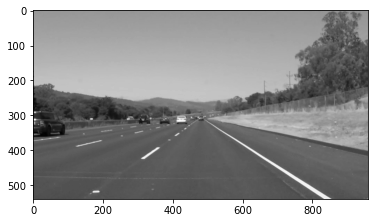

In [10]:
# Converting image to grayscale
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_image = grayscale(image) 
plt.imshow(gray_image, cmap="gray");

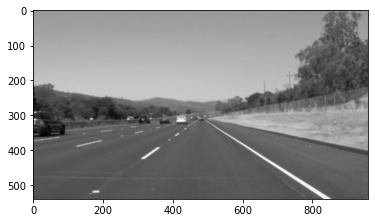

In [11]:
# Applying gaussian blur with kernel size 5 to smooth edges
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

kernelSize = 5
gaussian_image = gaussian_blur(gray_image, kernelSize)
plt.imshow(gaussian_image, cmap="gray");

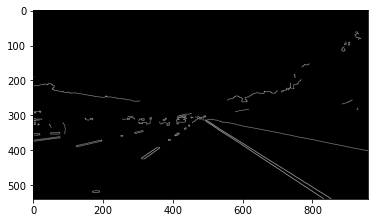

In [12]:
# Applying canny edge detection
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

minThreshold = 100
maxThreshold = 200

canny_image = canny(gaussian_image, minThreshold, maxThreshold)
plt.imshow(canny_image, cmap="gray");

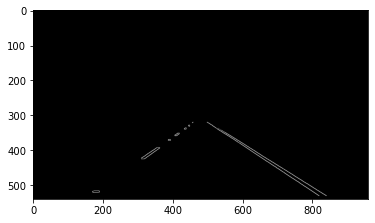

In [15]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# getting vertices
lowerLeft = [130, 530]
upperLeft = [450, 320]
upperRight = [500, 320]
lowerRight = [860, 530]

img_points = np.array([[lowerLeft, upperLeft, upperRight, lowerRight]], dtype=np.int32)
masked_image = region_of_interest(canny_image, img_points)

plt.imshow(masked_image, cmap="gray");

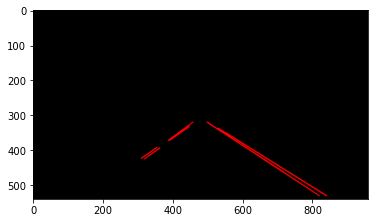

In [22]:
#img_copy = img.copy()

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)   
    draw_lines(line_img, lines)
    return line_img

    
rho = 1
theta = np.pi/180
threshold = 30
min_line_len = 20 
max_line_gap = 20

hough_image = hough_lines(masked_image, rho, theta, threshold, min_line_len, max_line_gap)

plt.imshow(hough_image);

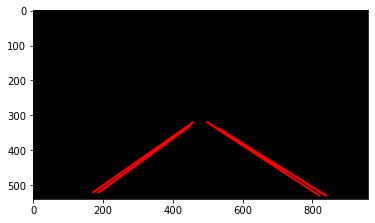

In [34]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    This function draws `lines` with `color` and `thickness`.    
    """
    #linesP = cv2.HoughLinesP(hough_image, 1, np.pi / 180, 50, None, 0, 1000)
    for line in lines:
        cv2.line(hough_image, (line[0][0], line[0][1]), (line[0][2], line[0][3]), color, thickness)
        #for x1,y1,x2,y2 in line:
            #cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    return hough_image

linesP = cv2.HoughLinesP(masked_image, 1, np.pi / 180, 50, None, 0, 1000)
color=[255, 0, 0]
thickness=2

image_lines = draw_lines(hough_image, linesP, color, thickness)
plt.imshow(image_lines);

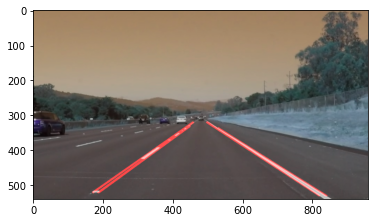

In [36]:
def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

final_image = weighted_img(image_lines, image)
plt.imshow(final_image);

In [37]:
import os
os.listdir("CarND-LaneLines-P1/test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

In [38]:
def process_image(image):
    gray_image = grayscale(image)
    
    kernelSize = 5
    gaussian_image = gaussian_blur(gray_image, kernelSize)
    
    minThreshold = 100
    maxThreshold = 200
    canny_image = canny(gaussian_image, minThreshold, maxThreshold)
    
    lowerLeft = [130, 530]
    upperLeft = [450, 320]
    upperRight = [500, 320]
    lowerRight = [860, 530]
    img_points = np.array([[lowerLeft, upperLeft, upperRight, lowerRight]], dtype=np.int32)
    masked_image = region_of_interest(canny_image, img_points)
    
    rho = 1
    theta = np.pi/180
    threshold = 30
    min_line_len = 20 
    max_line_gap = 20
    hough_image = hough_lines(masked_image, rho, theta, threshold, min_line_len, max_line_gap)
    
    final_image = weighted_img(image_lines, image)
    
    return final_image

In [42]:
for i in os.listdir("CarND-LaneLines-P1/test_images/"):
    print(i) 
    img = cv2.imread("CarND-LaneLines-P1/test_images/" + str(i)) 
    process_image(img)

solidWhiteCurve.jpg
solidWhiteRight.jpg
solidYellowCurve.jpg
solidYellowCurve2.jpg
solidYellowLeft.jpg
whiteCarLaneSwitch.jpg


In [44]:
img = cv2.imread('CarND-LaneLines-P1/test_images/' + str(i))
    #print(img.shape)

initial_img = img.copy()
height = img.shape[0]
#print(height)
width = img.shape[1]
#print(width)

img_points = [(0, height), (width/2, height/2), (width, height)]
print(img_points)

[(0, 540), (480.0, 270.0), (960, 540)]


In [ ]:
filename = 'out' + str(i)
    cv2.imwrite(filename, img_copy)
    return img_copy

for i in os.listdir("test_images/"):
    print(i)

    img = cv2.imread('test_images/' + str(i))
    line_detector(img)